In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In this dataset we have to predict the students grades by considering the last 4 years data. So it is an regression problem.

In [4]:
df.shape

(571, 43)

In this dataset there is an 43 columns and 571 rows

In [5]:
df.columns    #fetching the column names

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [6]:
df.columns.tolist()  #converted into the list

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [7]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

Here all the columns have object datatype except the target variable which is float datatype CGPA

In [8]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df  

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


Here we have converted the object data into the numerical data

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Here we are finding null values in most of the columns 

In [10]:
df=df.fillna(df.median())

In [11]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Treated null values using median

In [12]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    float64
 1   PH-121     571 non-null    float64
 2   HS-101     571 non-null    float64
 3   CY-105     571 non-null    float64
 4   HS-105/12  571 non-null    float64
 5   MT-111     571 non-null    float64
 6   CS-105     571 non-null    float64
 7   CS-106     571 non-null    float64
 8   EL-102     571 non-null    float64
 9   EE-119     571 non-null    float64
 10  ME-107     571 non-null    float64
 11  CS-107     571 non-null    float64
 12  HS-205/20  571 non-null    float64
 13  MT-222     571 non-null    float64
 14  EE-222     571 non-null    float64
 15  MT-224     571 non-null    float64
 16  CS-210     571 non-null    float64
 17  CS-211     571 non-null    float64
 18  CS-203     571 non-null    float64
 19  CS-214     571 non-null    float64
 20  EE-217    

In [14]:
# checking the values count 
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0.0      1
383.0    1
377.0    1
378.0    1
379.0    1
        ..
184.0    1
183.0    1
182.0    1
181.0    1
570.0    1
Name: Seat No., Length: 571, dtype: int64


2.0     112
0.0     111
4.0      61
3.0      57
5.0      56
9.0      44
6.0      33
7.0      31
10.0     22
1.0      22
8.0      19
12.0      2
11.0      1
Name: PH-121, dtype: int64


2.0     82
5.0     78
6.0     68
3.0     63
4.0     59
8.0     50
7.0     47
9.0     45
0.0     38
10.0    36
1.0      4
11.0     1
Name: HS-101, dtype: int64


0.0     177
2.0     121
4.0      50
3.0      49
5.0      42
9.0      31
1.0      31
6.0      19
7.0      17
8.0      16
10.0     14
12.0      3
11.0      1
Name: CY-105, dtype: int64


0.0     96
2.0     75
4.0     71
3.0     57
9.0     45
6.0     41
5.0     40
7.0     39
8.0     36
10.0    34
1.0     34
12.0     2
11.0     1
Name: HS-105/12, dtype: int64


2.0     105
0.0     100
5.0      70
4.0      64
3.0      55
8.0      39
7.0      33
6.0      30
9.0      26
1.0      23
10.0     

Here we have CGPA more number of unique values so it is an regression problem.

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.901926,4.248687,3.903678,2.838879,4.129597,3.963222,3.889667,...,4.124343,4.835377,3.495622,5.427320,2.984238,2.443082,3.901926,4.015762,3.187391,2.954888
std,164.977776,3.046895,2.785317,2.962487,3.195580,2.986432,2.696709,2.724293,3.029744,2.655695,...,3.337236,2.740382,2.938773,2.707279,2.468346,2.473332,2.365879,2.778002,2.295285,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,570.000000,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


By observing describe method there is no null values and all the columns are categorical in nature so that we cant do anything with that columns

In [17]:
df.drop('Seat No.', axis=1, inplace=True)

Dropping Seat No. as it is unique and not contrubuting anything to the target variable

In [18]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


<AxesSubplot:>

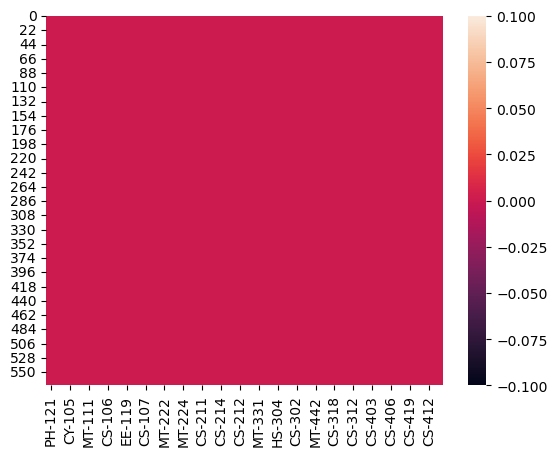

In [19]:
sns.heatmap(df.isnull())

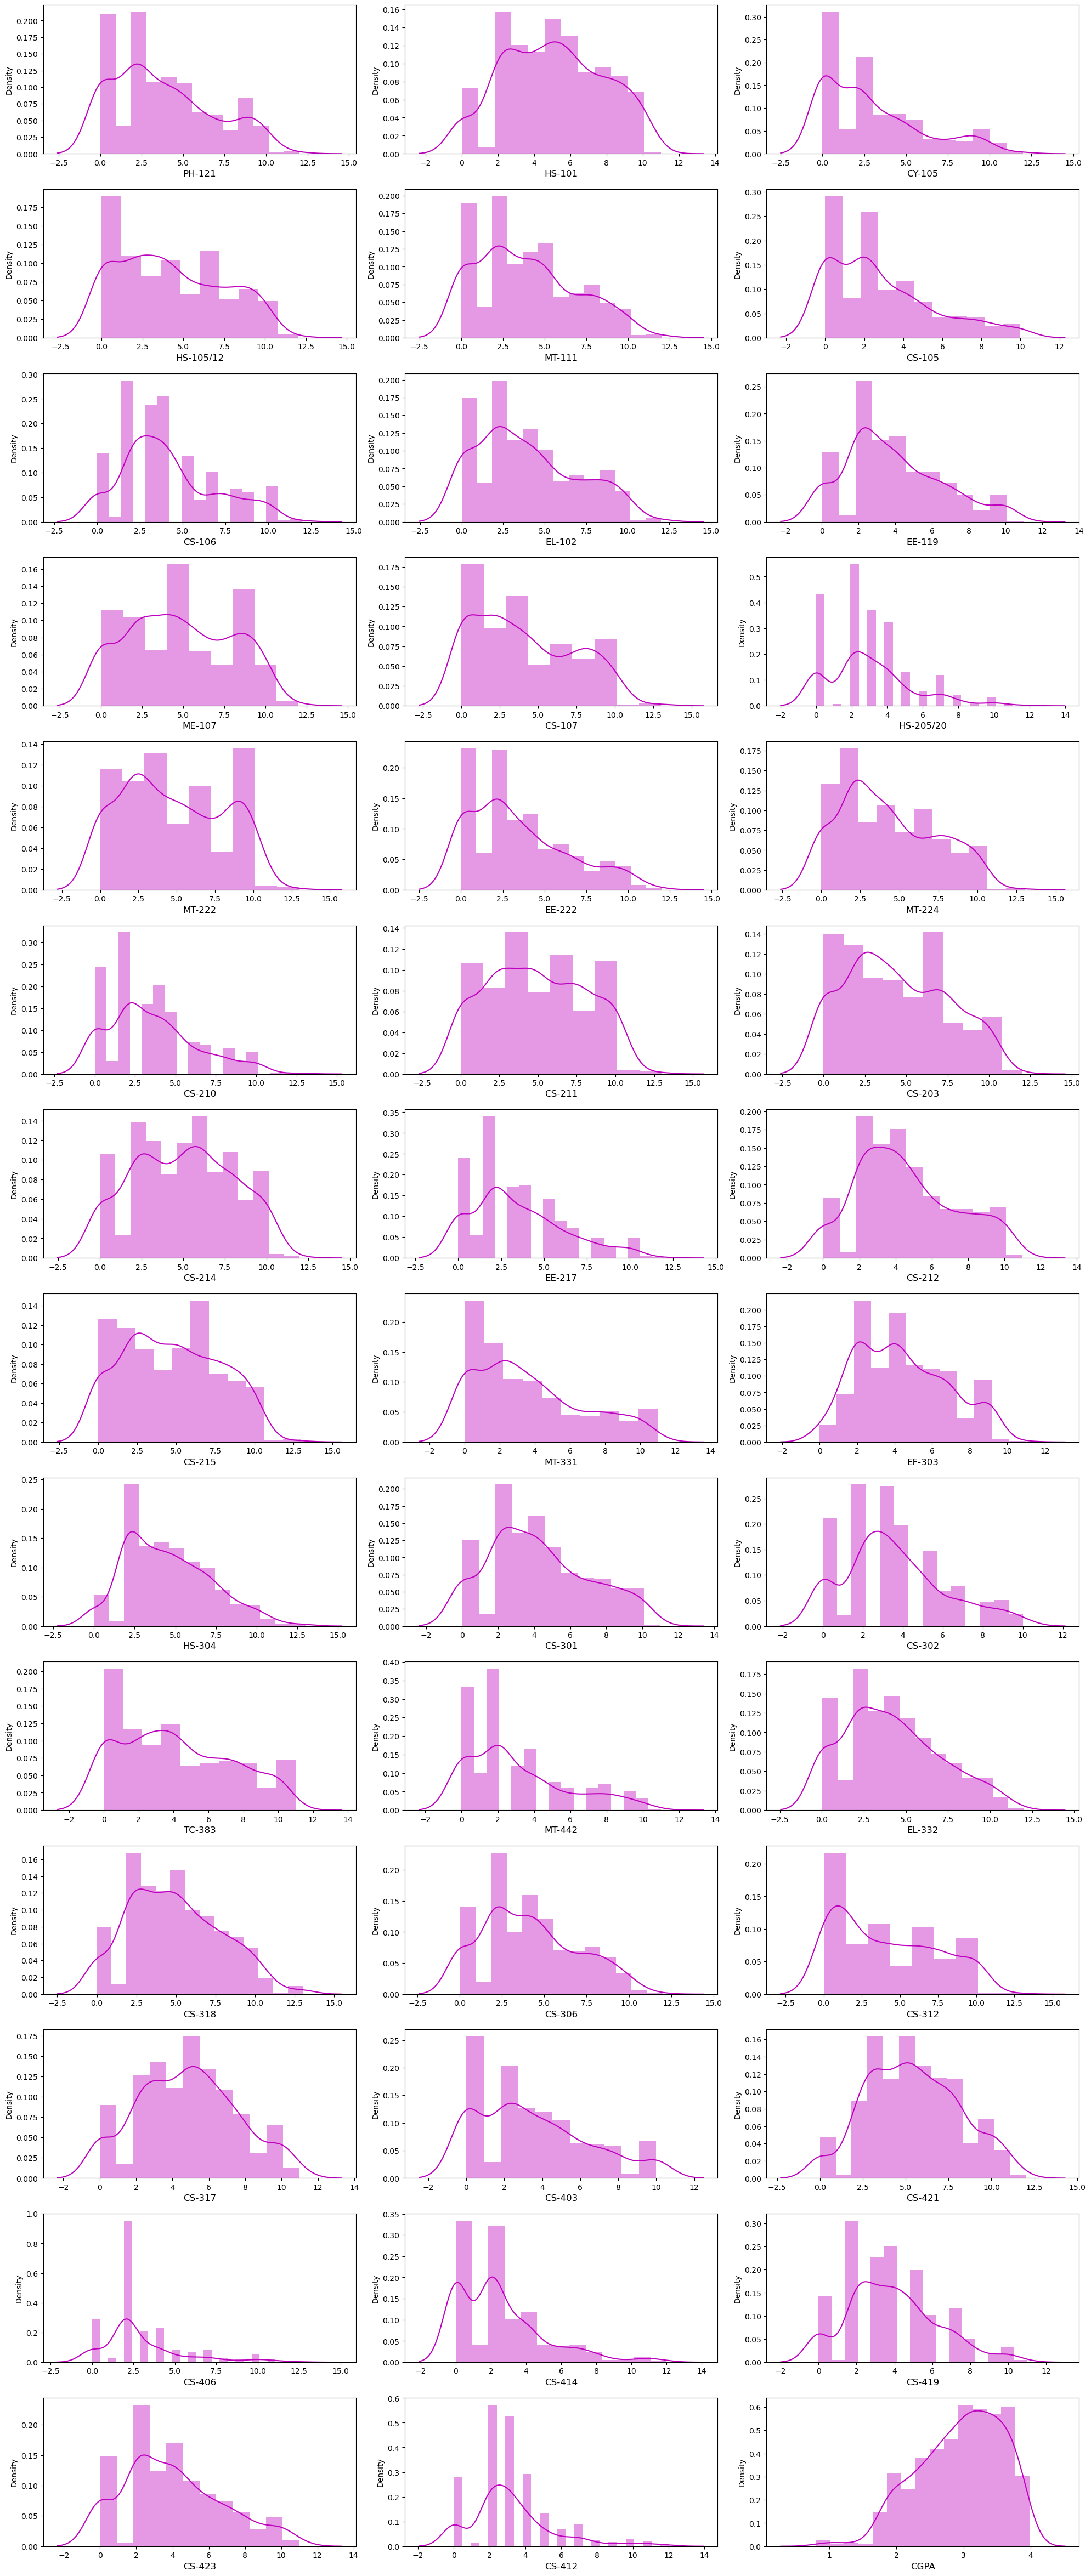

In [20]:
# lets check how data distributed

plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

Here data is distributed normally in all columns except CS-406 and CS-412 

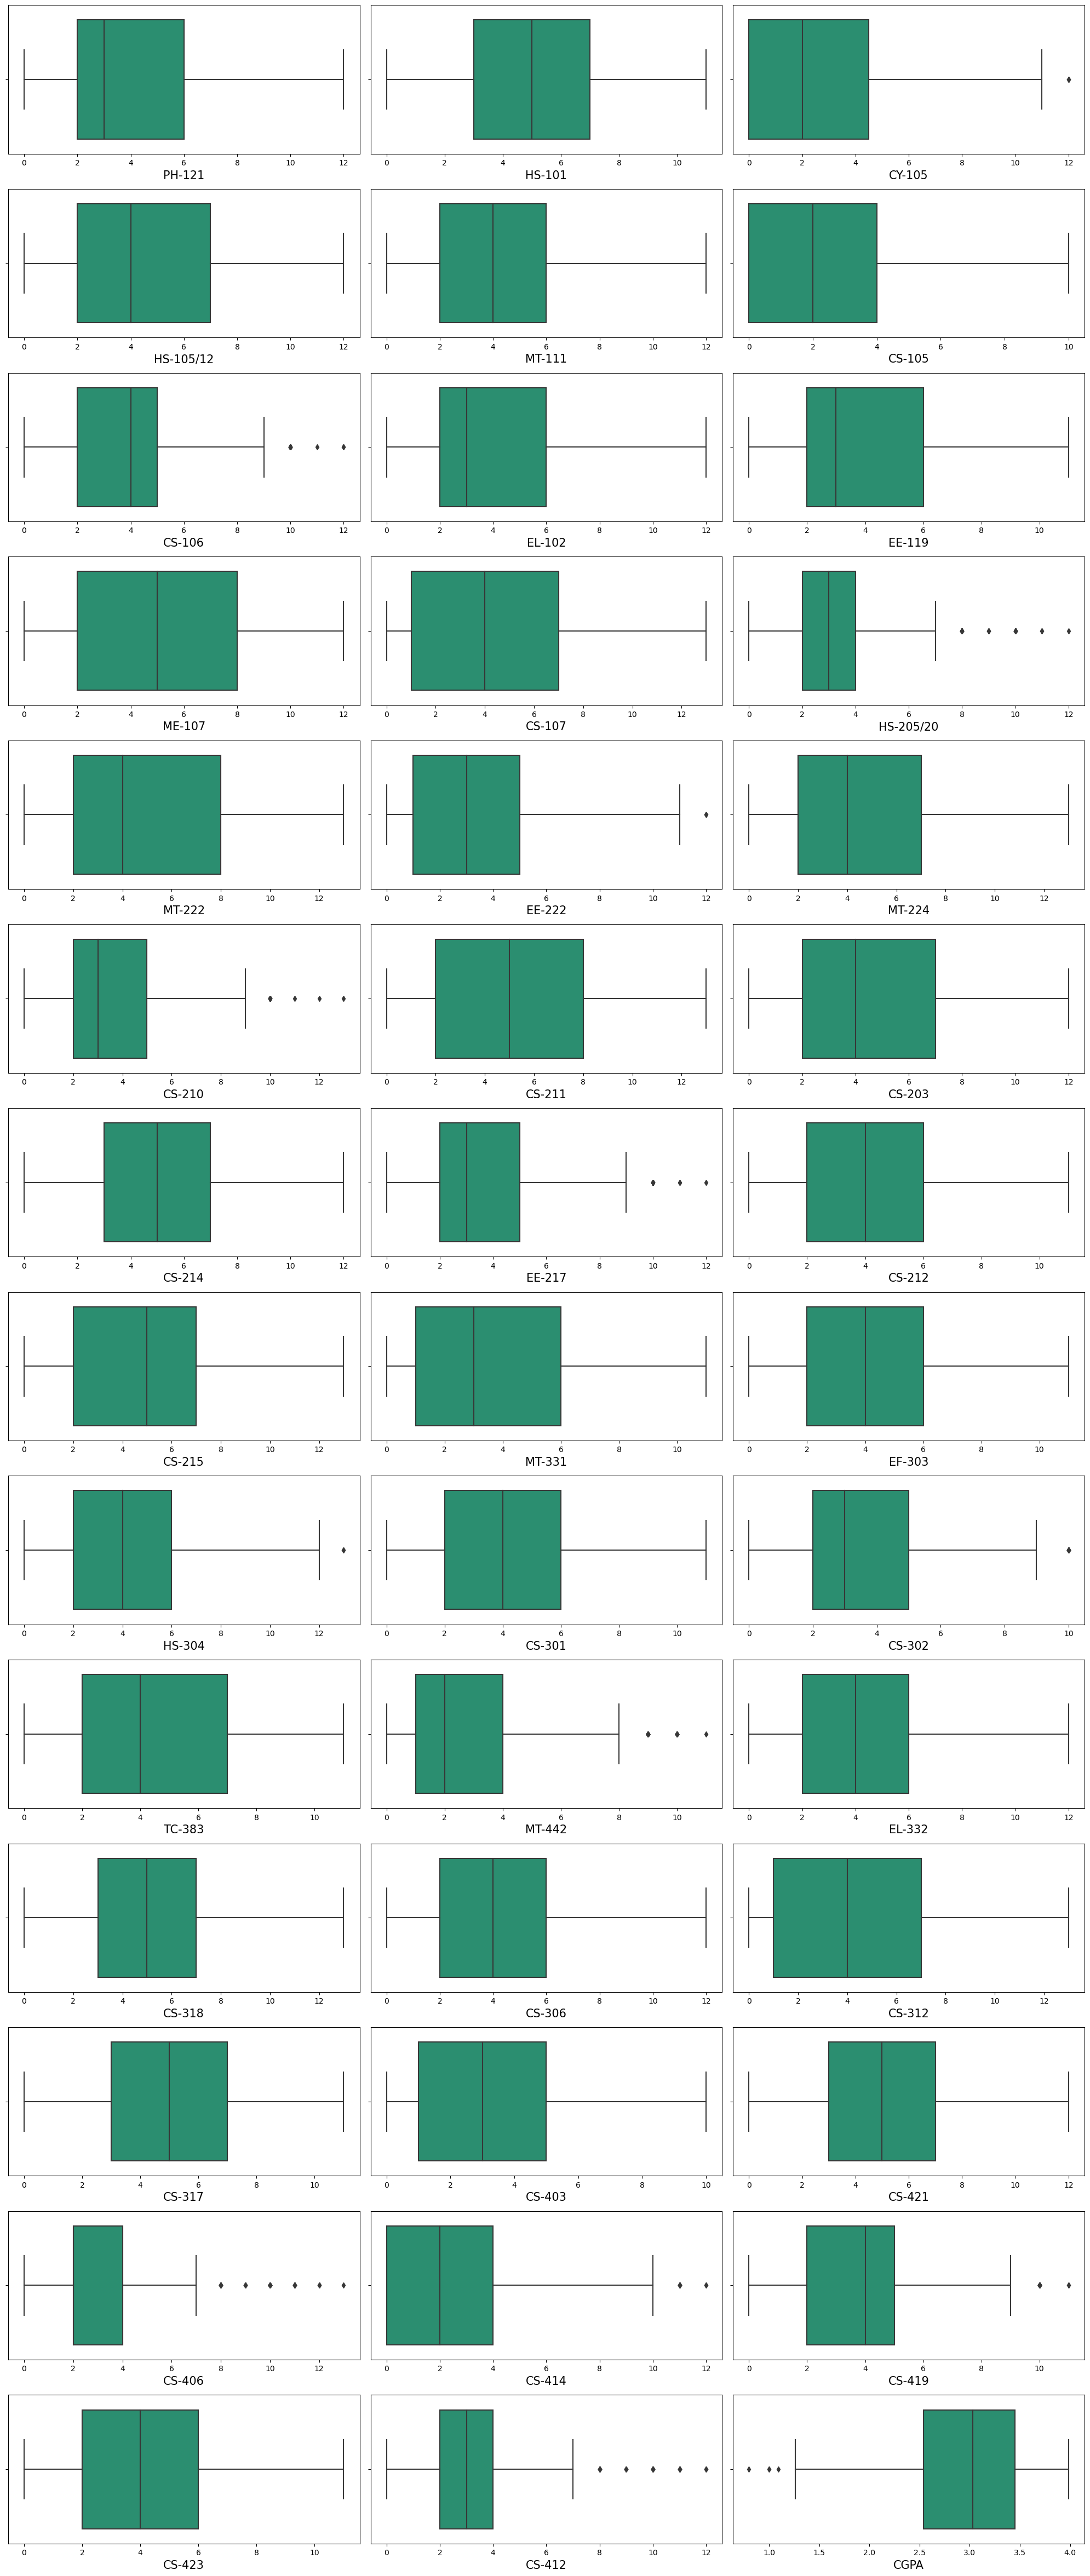

In [21]:
# lets check the outliers by using box plot

plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=45:
        ax=plt.subplot(15,3,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()  

Here outliers present in CS-106,HS-205/20,EE-222,CS-210,EE-217,HS-304,MT-442,CS-406,CS-414,CS-419,CS-412

In [22]:
#lets treat the outliers

from scipy.stats import zscore
out_features=df[['CS-106','HS-205/20','EE-222','CS-210','EE-217','HS-304','MT-442','CS-406','CS-414','CS-419','CS-412']]
z=np.abs(zscore(out_features))
z

,CS-106,HS-205/20,EE-222,CS-210,EE-217,HS-304,MT-442,CS-406,CS-414,CS-419,CS-412
0,1.789335,0.432547,0.481873,1.270699,1.288378,0.928616,0.339563,0.399094,0.988636,1.733676,0.517771
1,1.789335,1.710053,1.543766,2.370047,0.570298,1.307901,1.783812,0.399094,1.034701,0.887583,0.081713
2,0.319777,0.419123,1.157085,1.294445,1.288378,1.726376,1.104686,1.210063,0.988636,1.650696,1.389887
3,2.156725,0.006712,0.530947,0.904250,2.428973,0.170047,1.783812,0.817361,0.225366,1.310629,1.662518
4,0.782392,1.270794,0.481873,0.561546,1.288378,0.967807,0.382562,0.399094,0.988636,0.804603,1.389887
...,...,...,...,...,...,...,...,...,...,...,...
566,0.782392,1.270794,1.157085,1.294445,1.288378,0.967807,0.743624,1.210063,0.630034,0.041490,1.389887
567,1.517171,0.432547,0.481873,1.294445,1.288378,1.726376,0.743624,0.399094,0.225366,0.804603,0.517771
568,1.517171,0.858382,0.193340,0.561546,1.288378,0.170047,0.339563,1.210063,1.439369,0.041490,0.517771
569,0.319777,1.710053,1.881373,0.537801,0.570298,0.549332,1.783812,2.439300,1.439369,0.381557,1.226460


In [23]:
# threshold = 3
np.where(z>3)

(array([ 60,  60,  91, 281, 281, 288, 340, 340, 352, 352, 382, 387, 387,
        410, 423, 424, 432, 446, 447, 447, 453, 453, 454, 454, 454, 509,
        513, 516, 516, 521, 522, 522, 527, 543, 543, 550, 550, 557, 560,
        563, 570], dtype=int64),
 array([ 1,  4,  3,  1,  3,  1,  5,  8,  5,  8,  8,  8, 10,  8,  8,  8, 10,
         7,  7,  8,  7, 10,  7,  8,  9,  7, 10,  7, 10,  7,  7, 10, 10,  7,
        10,  8, 10,  8,  8,  9,  7], dtype=int64))

In [24]:
# now removing the data which is above zscore and creating new df

df1=df[(z<3).all(axis=1)]
df1.shape

(543, 42)

In [25]:
print('Old Dataframe',df.shape)
print('New Dataframe',df1.shape)

Old Dataframe (571, 42)
New Dataframe (543, 42)


In [26]:
print('Data Loss percentage', ((df.shape[0]-df1.shape[0]))/df.shape[0]*100)

Data Loss percentage 4.903677758318739


In [27]:
df=df1

In [28]:
df.skew()

PH-121       0.580412
HS-101       0.078702
CY-105       0.993997
HS-105/12    0.356367
MT-111       0.506909
CS-105       0.979626
CS-106       0.657559
EL-102       0.555447
EE-119       0.617856
ME-107       0.126396
CS-107       0.464698
HS-205/20    0.800808
MT-222       0.188653
EE-222       0.739148
MT-224       0.431722
CS-210       0.672335
CS-211       0.080437
CS-203       0.280967
CS-214       0.036119
EE-217       0.741025
CS-212       0.414920
CS-215       0.142664
MT-331       0.670063
EF-303       0.346467
HS-304       0.444196
CS-301       0.413107
CS-302       0.614942
TC-383       0.363533
MT-442       0.876967
EL-332       0.442940
CS-318       0.330182
CS-306       0.421678
CS-312       0.435992
CS-317       0.146226
CS-403       0.603988
CS-421       0.095714
CS-406       1.362806
CS-414       0.889805
CS-419       0.433199
CS-423       0.481945
CS-412       0.755606
CGPA        -0.492201
dtype: float64

Here CS-406 have the skewness

In [29]:
# removing skewness using cube root

df['CS-406']=np.cbrt(df['CS-406'])

In [30]:
df.skew()

PH-121       0.580412
HS-101       0.078702
CY-105       0.993997
HS-105/12    0.356367
MT-111       0.506909
CS-105       0.979626
CS-106       0.657559
EL-102       0.555447
EE-119       0.617856
ME-107       0.126396
CS-107       0.464698
HS-205/20    0.800808
MT-222       0.188653
EE-222       0.739148
MT-224       0.431722
CS-210       0.672335
CS-211       0.080437
CS-203       0.280967
CS-214       0.036119
EE-217       0.741025
CS-212       0.414920
CS-215       0.142664
MT-331       0.670063
EF-303       0.346467
HS-304       0.444196
CS-301       0.413107
CS-302       0.614942
TC-383       0.363533
MT-442       0.876967
EL-332       0.442940
CS-318       0.330182
CS-306       0.421678
CS-312       0.435992
CS-317       0.146226
CS-403       0.603988
CS-421       0.095714
CS-406      -1.231994
CS-414       0.889805
CS-419       0.433199
CS-423       0.481945
CS-412       0.755606
CGPA        -0.492201
dtype: float64

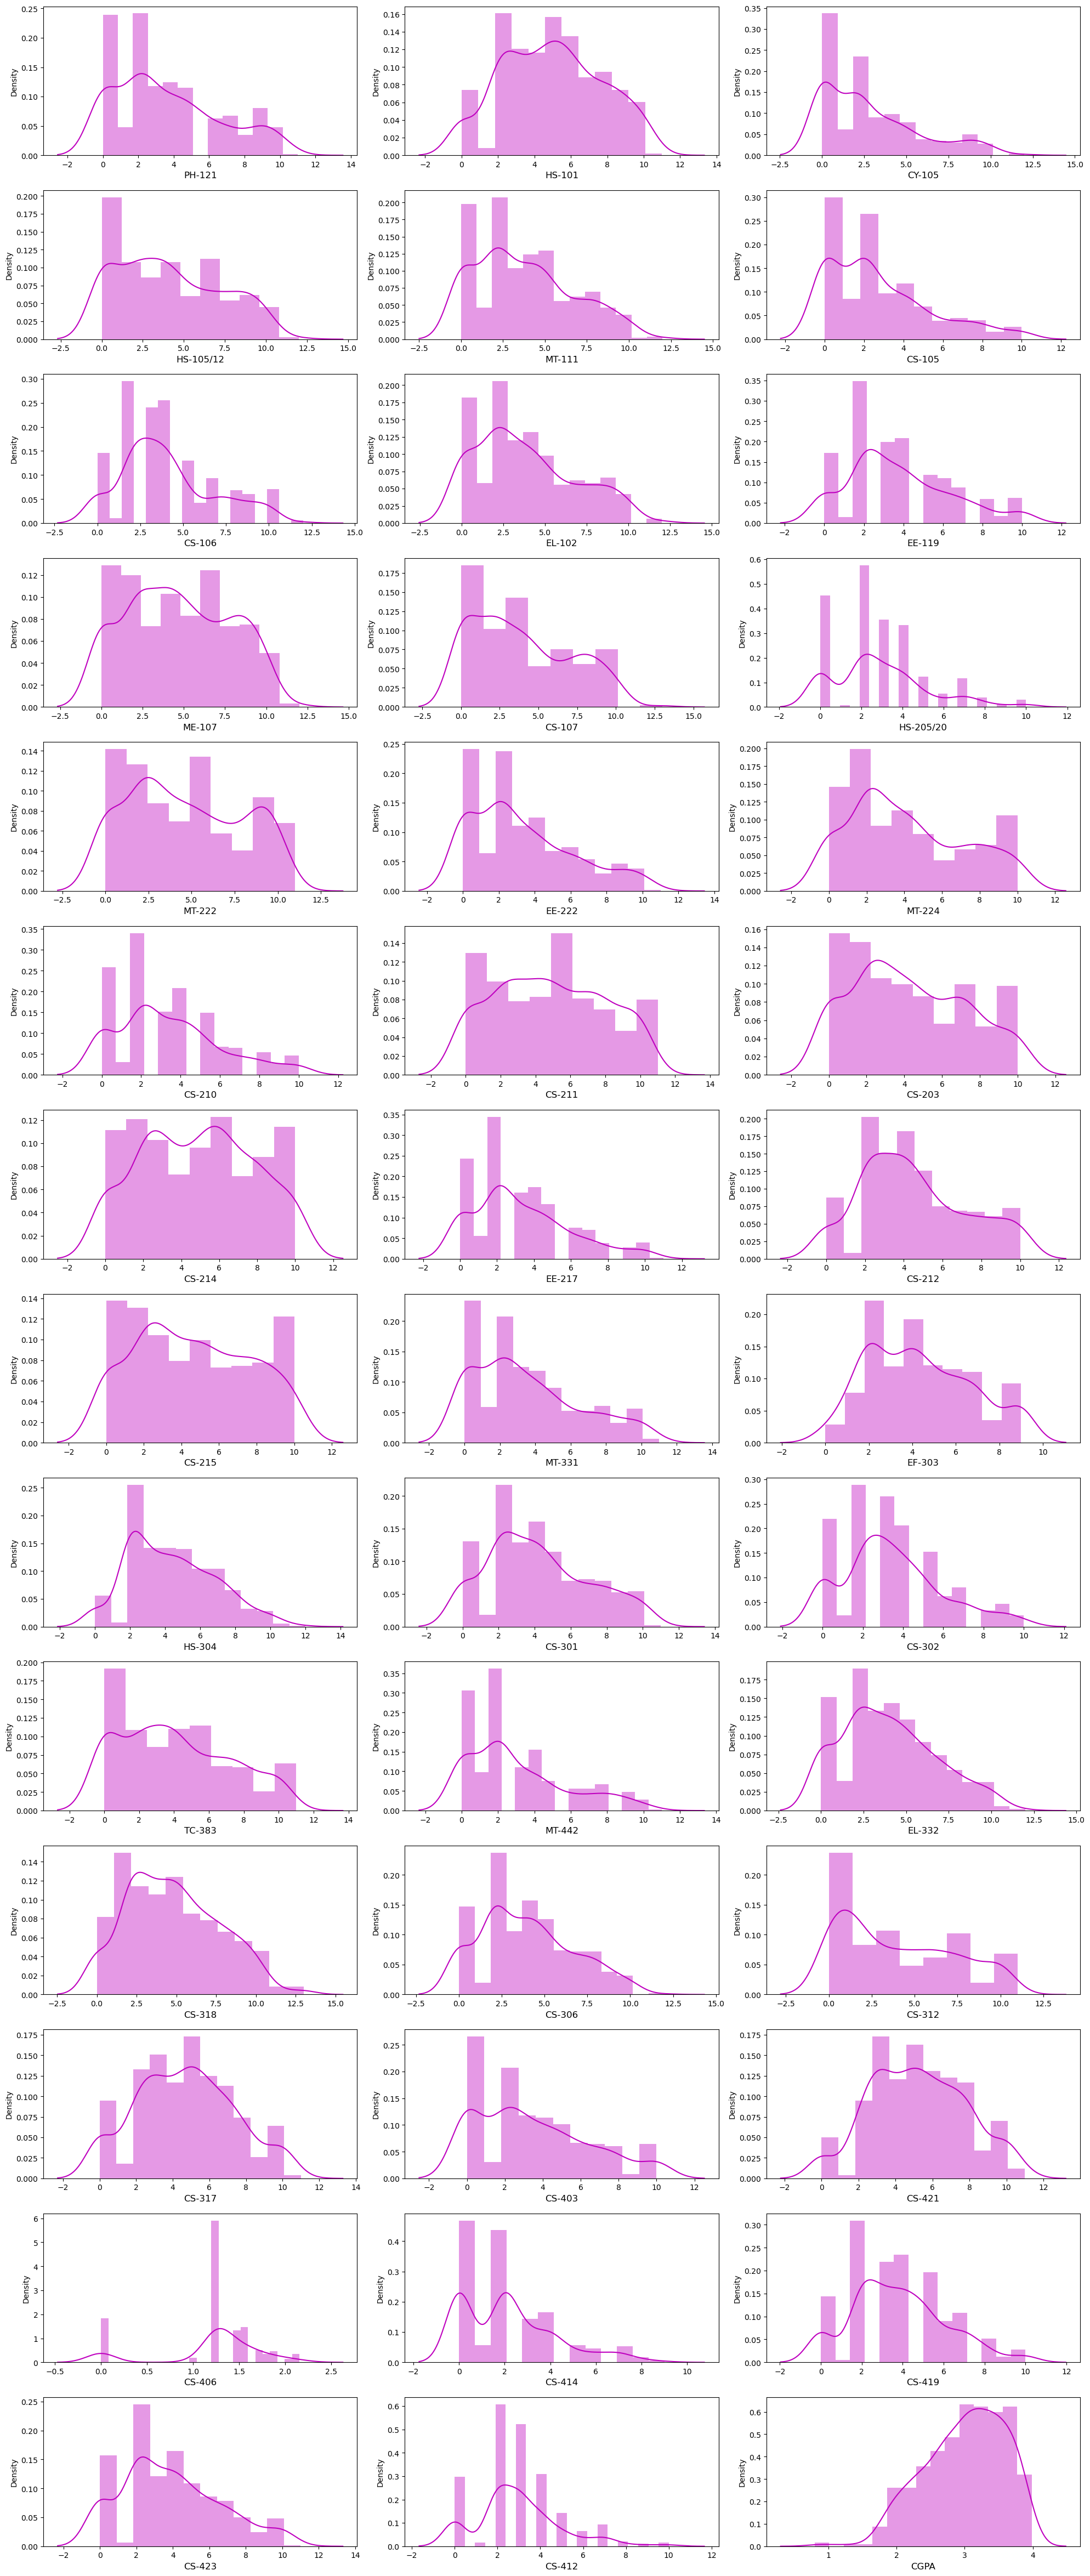

In [31]:
# lets check how data distributed

plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for col in df:
    if plotnumber<=50:
        ax=plt.subplot(15,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()

Here we have treated the skewness of CS-406

In [32]:
# checking correletion
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.360272,0.541907,0.496166,0.439900,0.594520,0.300089,0.399991,0.575859,0.523628,...,0.044107,0.455652,0.358848,0.296506,0.283325,0.108882,0.496732,0.120346,0.403903,-0.642106
HS-101,0.360272,1.000000,0.324176,0.485931,0.420378,0.383950,0.337544,0.333393,0.305989,0.330957,...,0.224229,0.352473,0.251302,0.298439,0.200354,0.177703,0.301322,0.241523,0.246610,-0.525041
CY-105,0.541907,0.324176,1.000000,0.508737,0.535708,0.574794,0.390519,0.426499,0.478110,0.470986,...,0.300735,0.500075,0.520464,0.410110,0.169315,0.002453,0.498522,0.176776,0.176678,-0.671716
HS-105/12,0.496166,0.485931,0.508737,1.000000,0.494496,0.477805,0.499342,0.349246,0.378498,0.303912,...,0.287351,0.489724,0.485208,0.445365,0.116854,0.113395,0.492254,0.242745,0.195692,-0.619988
MT-111,0.439900,0.420378,0.535708,0.494496,1.000000,0.365188,0.524412,0.540820,0.398466,0.460136,...,0.496932,0.552974,0.456922,0.533833,0.285405,0.202960,0.533220,0.449355,0.291785,-0.732807
CS-105,0.594520,0.383950,0.574794,0.477805,0.365188,1.000000,0.308409,0.322860,0.497566,0.433788,...,0.059002,0.378903,0.321496,0.246124,0.237567,0.084724,0.344711,0.049484,0.245817,-0.589493
CS-106,0.300089,0.337544,0.390519,0.499342,0.524412,0.308409,1.000000,0.345213,0.267276,0.301240,...,0.495286,0.425528,0.469673,0.431926,0.105055,0.095742,0.445589,0.345184,0.184076,-0.561802
EL-102,0.399991,0.333393,0.426499,0.349246,0.540820,0.322860,0.345213,1.000000,0.436723,0.457852,...,0.316402,0.458898,0.341197,0.379695,0.240653,0.235571,0.410895,0.405689,0.293649,-0.632464
EE-119,0.575859,0.305989,0.478110,0.378498,0.398466,0.497566,0.267276,0.436723,1.000000,0.555771,...,0.145230,0.436000,0.374440,0.354680,0.289708,0.153853,0.470975,0.234634,0.378358,-0.631648
ME-107,0.523628,0.330957,0.470986,0.303912,0.460136,0.433788,0.301240,0.457852,0.555771,1.000000,...,0.214288,0.461746,0.362704,0.350744,0.283084,0.124307,0.466430,0.240928,0.355242,-0.663652


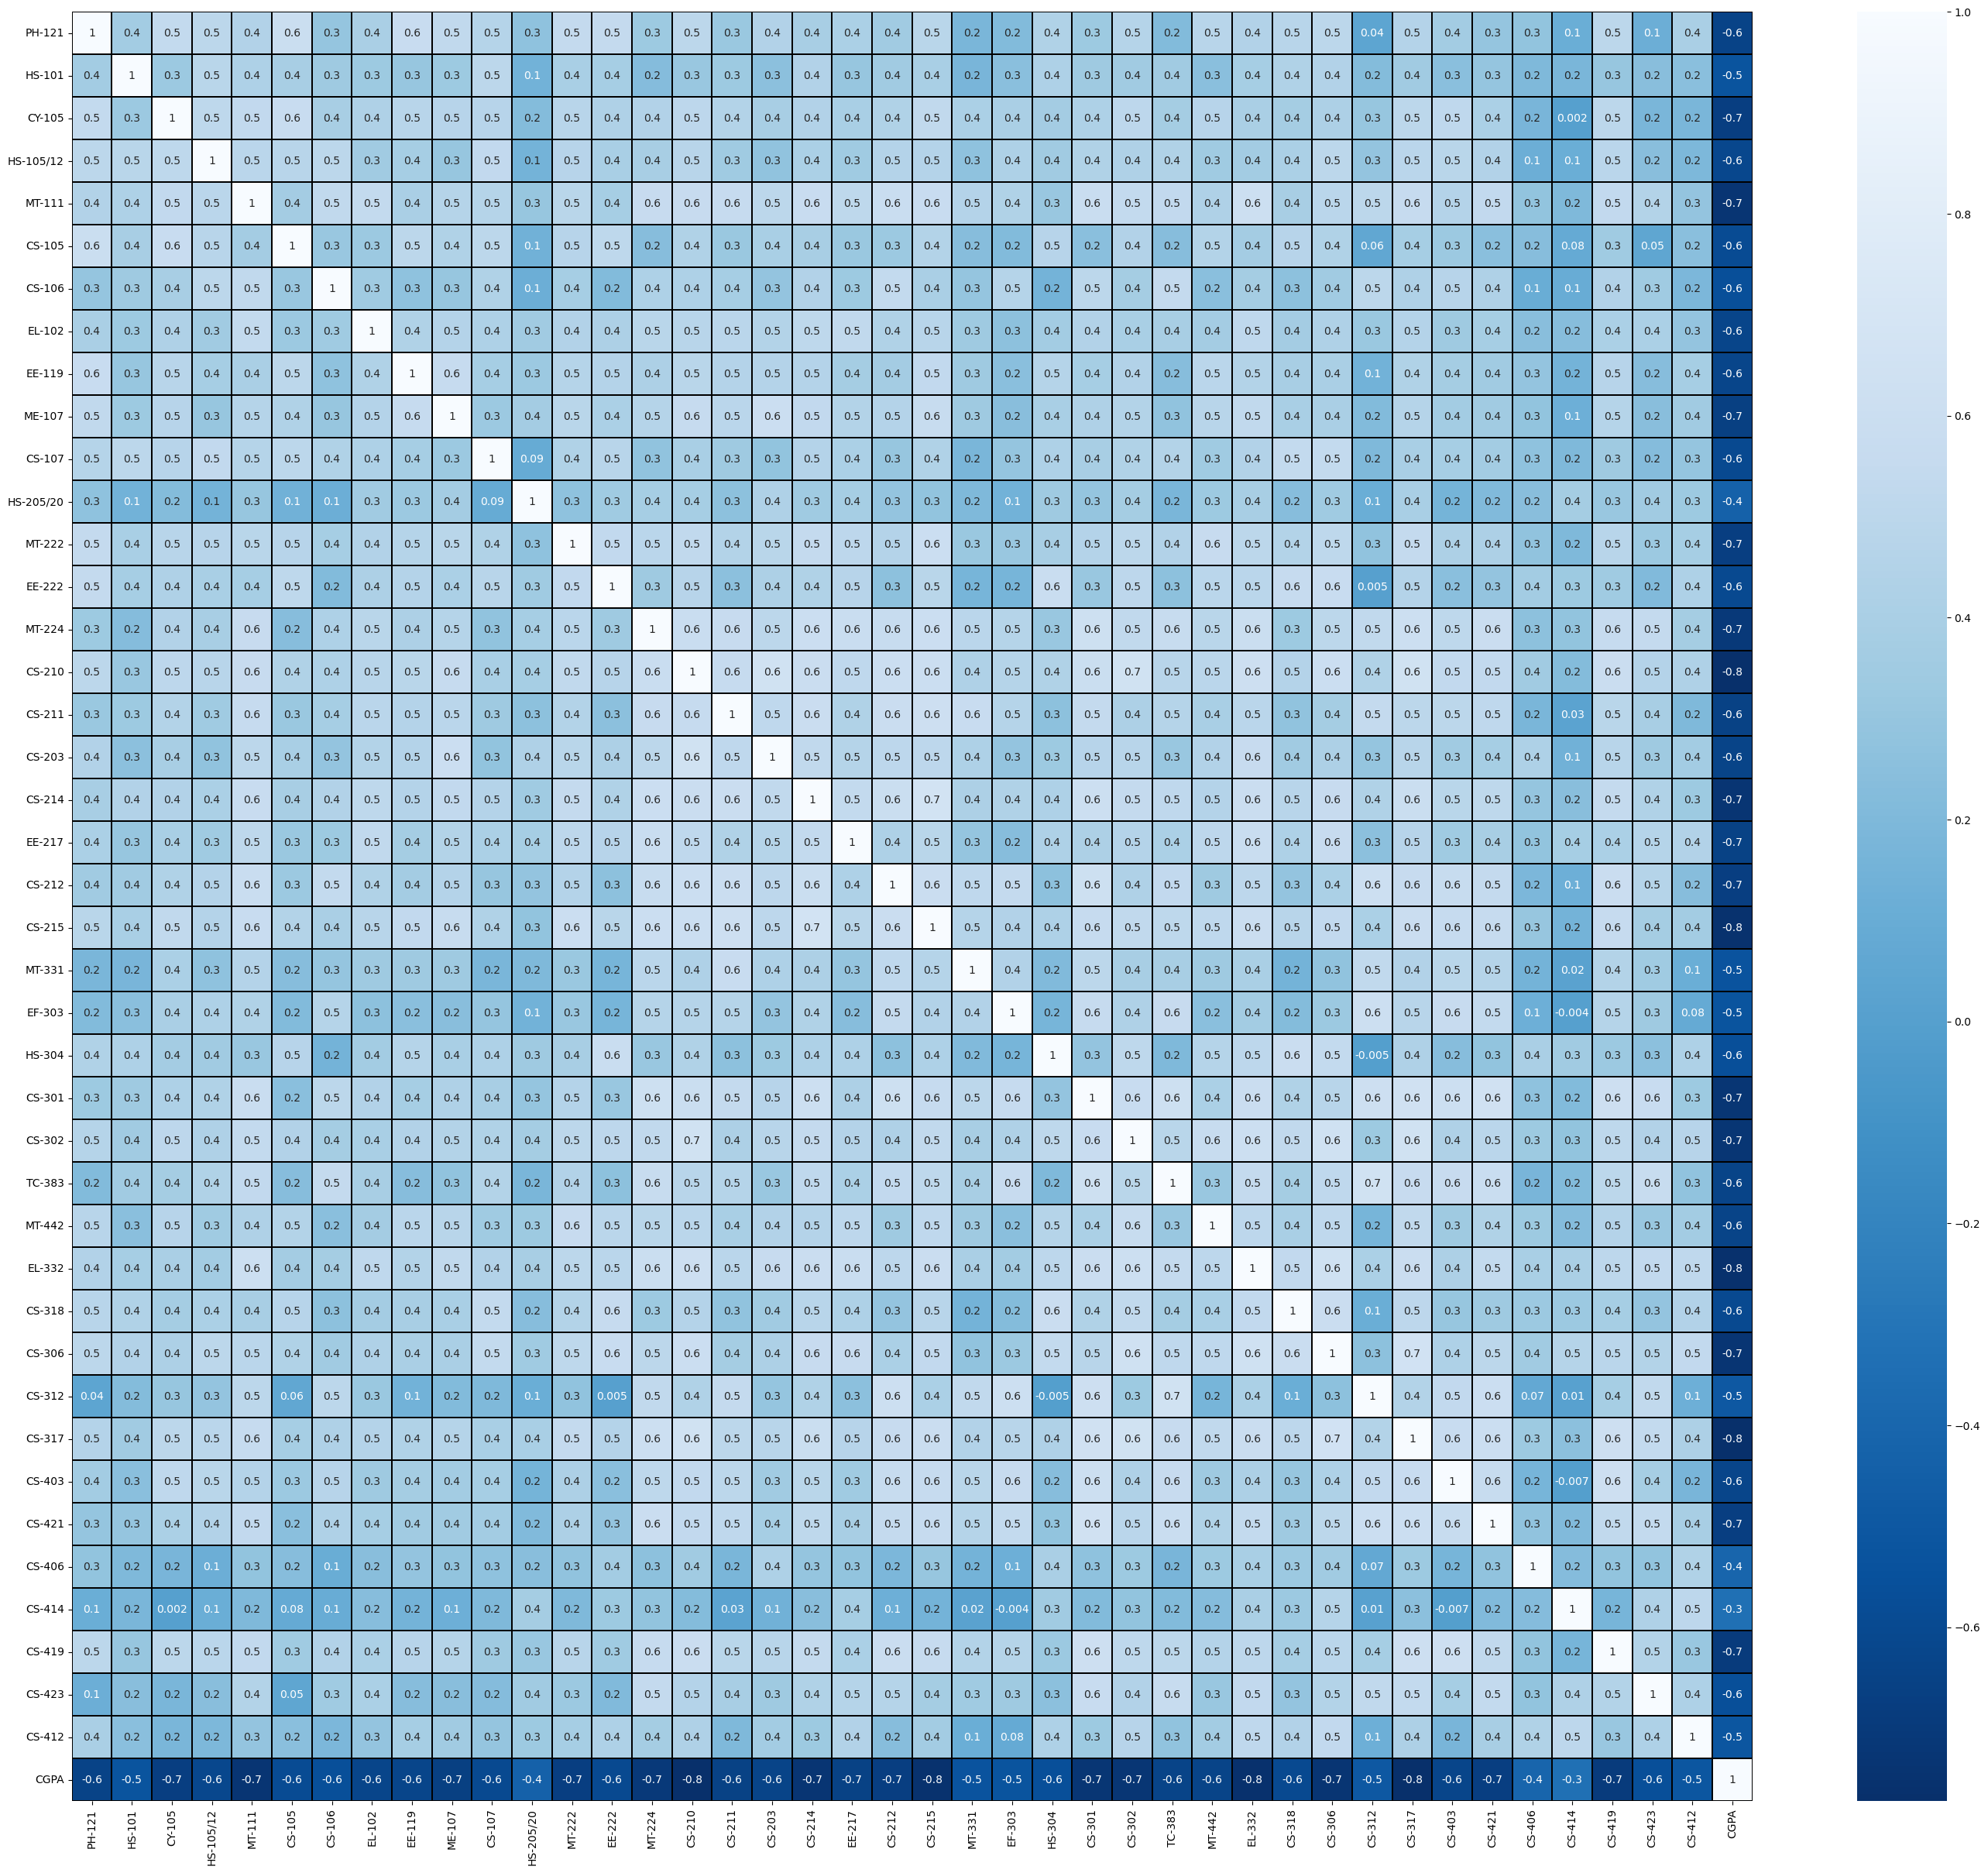

In [33]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

By observing the color coding we can say that there is an strong relation of all features towards the target

In [34]:
cor=df.corr()

cor["CGPA"].sort_values(ascending=False)

CGPA         1.000000
CS-414      -0.335526
CS-406      -0.411923
HS-205/20   -0.440024
CS-312      -0.501686
CS-412      -0.509814
HS-101      -0.525041
EF-303      -0.529099
MT-331      -0.534051
CS-106      -0.561802
HS-304      -0.562429
CS-423      -0.562858
CS-105      -0.589493
EE-222      -0.602186
CS-318      -0.605632
CS-107      -0.605776
HS-105/12   -0.619988
EE-119      -0.631648
EL-102      -0.632464
CS-403      -0.633210
MT-442      -0.635054
TC-383      -0.639141
CS-203      -0.640674
PH-121      -0.642106
CS-211      -0.648061
EE-217      -0.654631
ME-107      -0.663652
CY-105      -0.671716
CS-421      -0.672210
CS-212      -0.673649
MT-222      -0.674464
CS-419      -0.695974
MT-224      -0.708093
CS-301      -0.725915
CS-302      -0.729802
MT-111      -0.732807
CS-306      -0.734984
CS-214      -0.735580
CS-215      -0.754537
EL-332      -0.759059
CS-317      -0.765869
CS-210      -0.772465
Name: CGPA, dtype: float64

Here all the features have negative correlation with the target

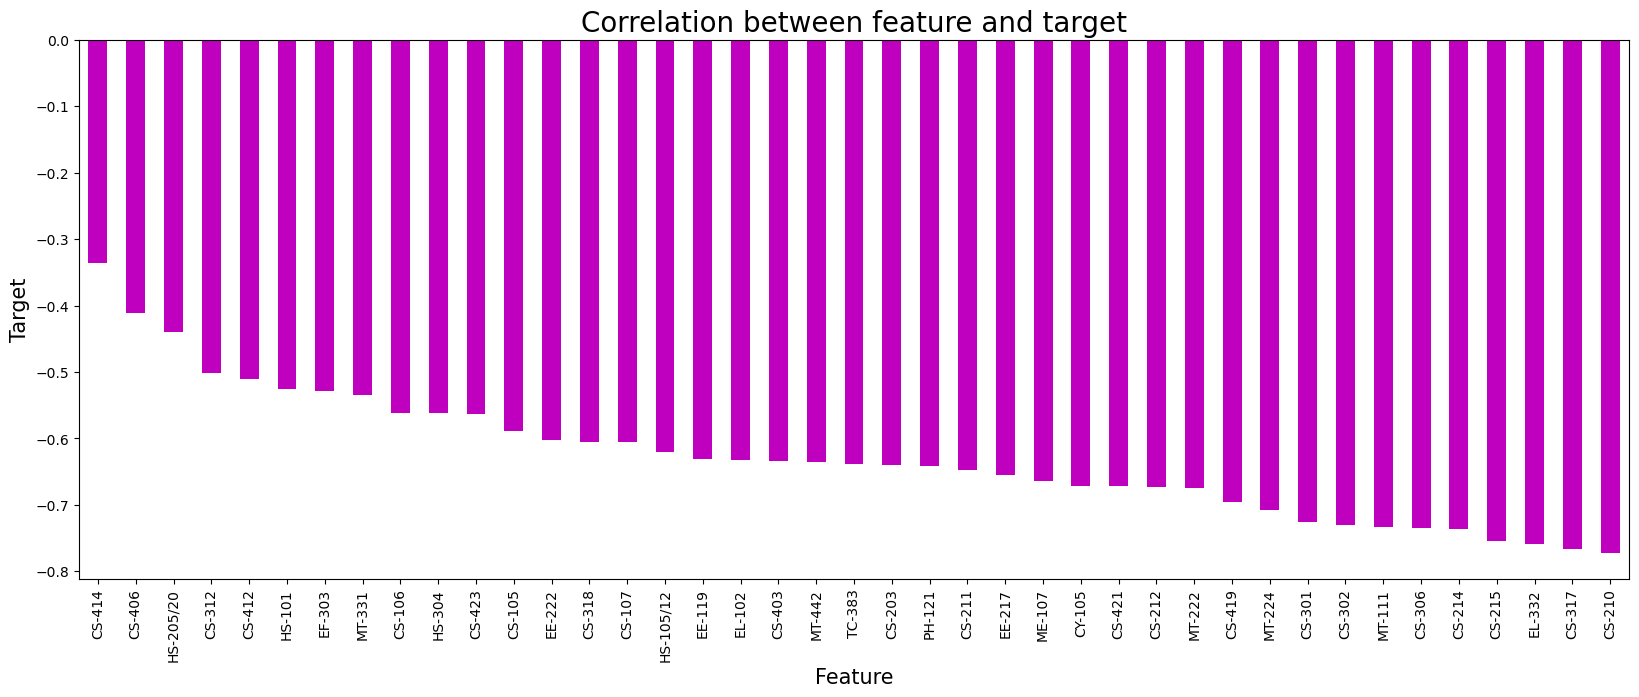

In [35]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

In [36]:
x=df.drop("CGPA",axis=1)
y=df["CGPA"]

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.451240,1.843542,1.793460,0.591843,1.446142,2.774724,1.819141,1.392387,0.477028,1.071904,...,0.753980,1.212855,1.232011,1.531563,1.062665,0.070264,-1.05139,1.822971,-0.329478,-0.490846
1,-1.220133,1.477396,2.486838,1.543582,0.420559,1.248977,1.819141,-1.283953,2.407178,1.394009,...,1.855535,1.820682,1.604289,0.855159,1.448637,0.070264,1.38421,0.956182,0.774882,0.022698
2,-1.220133,-0.719480,-0.980050,0.274596,0.078697,-1.039643,0.345922,0.054217,-0.681062,-0.860726,...,-0.714759,-0.306712,-0.629375,-1.174053,0.290723,-2.205277,-1.05139,-1.644186,-0.697597,-1.517936
3,1.788338,0.745104,2.486838,1.543582,1.788003,-0.276770,2.187446,1.392387,2.021148,0.749799,...,1.488350,1.820682,0.487457,2.207967,1.062665,0.883108,0.40997,1.389576,1.143002,2.076876
4,-0.551584,-1.085627,-0.286673,-0.042650,-1.288747,-1.039643,-0.758993,0.054217,-1.453122,-0.860726,...,-0.714759,0.301115,-0.257098,0.178755,-0.095249,0.070264,-1.05139,-0.777397,-0.697597,-1.517936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,2.456887,2.209688,2.140149,1.226336,0.078697,2.774724,1.819141,-0.280326,-0.295032,0.105589,...,0.019610,-0.002798,0.115180,-0.159447,-0.095249,0.070264,-0.07715,0.089393,0.038642,0.022698
539,-0.217309,-1.817919,-0.980050,-0.677143,-0.946886,-1.039643,-0.758993,-0.614868,-1.067092,-0.216516,...,0.019610,-0.610625,-1.001652,-1.174053,-2.025106,-2.205277,0.89709,0.089393,-0.329478,-1.517936
540,-0.885858,-1.817919,-0.980050,-1.311636,-1.288747,-1.039643,-1.495603,-0.614868,-1.453122,-1.504937,...,-0.714759,-0.002798,-0.257098,-1.174053,-2.025106,0.070264,0.40997,-0.777397,0.774882,-0.490846
541,-0.217309,-1.817919,-0.286673,-0.042650,-1.288747,-1.039643,-1.495603,-1.283953,-1.453122,-0.538621,...,0.019610,-0.610625,-0.629375,-1.174053,-0.481220,-2.205277,1.87133,0.089393,-0.697597,-0.490846


In [38]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,2.810683,PH-121
1,1.815345,HS-101
2,2.477641,CY-105
3,2.394016,HS-105/12
4,2.684647,MT-111
5,2.380369,CS-105
6,1.984909,CS-106
7,1.925673,EL-102
8,2.151500,EE-119
9,2.321816,ME-107


By observing VIF we can say that there is no multicolinearity issue into the data

Modelling

In [39]:
#importing necessary libaries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [40]:
# finding the best random state

maxACCU=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=i
print("Maximum r2 score is:", maxACCU,  "on random state:",maxRS) 

Maximum r2 score is: 0.9828887619790788 on random state: 55


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [43]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.9828887619790788
R2_score on training data: 93.81446544645424
Mean absolute error: 0.060354791888966475
Mean Squared Error: 0.005949866340902441
Root Mean Squared Error: 0.07713537671459472


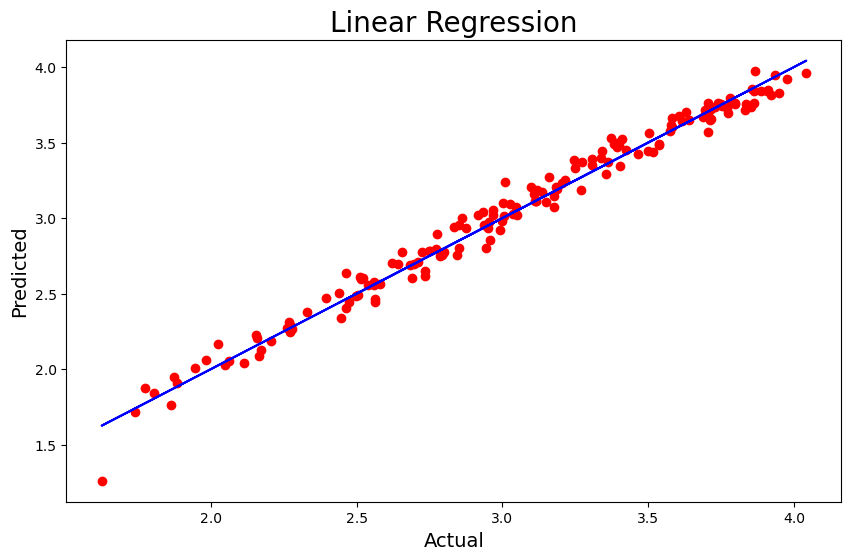

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression', fontsize=20)
plt.show()

In [45]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.9512455900149752
R2_score on training data: 98.49502103870456
Mean absolute error: 0.09257085889570531
Mean Squared Error: 0.016952731449693205
Root Mean Squared Error: 0.13020265530968717


In [46]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.9616237029298411
R2_score on training data: 93.61621836999741
Mean absolute error: 0.08607361963190185
Mean Squared Error: 0.013344086380368105
Root Mean Squared Error: 0.1155166065133845


In [47]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.9659741121003577
R2_score on training data: 99.64424935925688
Mean absolute error: 0.07829517515710187
Mean Squared Error: 0.011831375665856262
Root Mean Squared Error: 0.10877212724708597


In [48]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:',mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.010256652679289102
R2_score on training data: 0.0
Mean absolute error: 0.49944452696157576
Mean Squared Error: 0.3512832938271332
Root Mean Squared Error: 0.5926915671975882


In [49]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.9830054203823969
R2_score on training data: 93.81440636668526
Mean absolute error: 0.06007877048451961
Mean Squared Error: 0.005909302244579462
Root Mean Squared Error: 0.07687198608452536


In [50]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.8551052354395117
R2_score on training data: 100.0
Mean absolute error: 0.16988957055214723
Mean Squared Error: 0.05038235582822087
Root Mean Squared Error: 0.22446014307270873


In [51]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.965821411180909
R2_score on training data: 95.96038702945164
Mean absolute error: 0.07164590999405705
Mean Squared Error: 0.011884472353526765
Root Mean Squared Error: 0.10901592706355694


In [52]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:', r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.964689789311369
R2_score on training data: 100.0
Mean absolute error: 0.07879846625766859
Mean Squared Error: 0.012277956382208586
Root Mean Squared Error: 0.11080594019369443


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_LR)-score.mean())*100)

[0.93290558 0.9464466  0.96252072 0.97594501 0.87474854]
0.9385132918179396
Difference betweem r score and Cv is :  4.4375470161139186


In [55]:
score1=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_RFR)-score1.mean())*100)


[0.91327721 0.93446716 0.94027999 0.93456409 0.84552238]
0.9136221654737584
Difference betweem r score and Cv is :  3.762342454121681


In [56]:
score2=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score2)
print(score2.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_knn)-score2.mean())*100)


[0.9074436  0.93804365 0.9525205  0.94112341 0.82763483]
0.9133531982259042
Difference betweem r score and Cv is :  4.82705047039369


In [57]:
score3=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score3)
print(score3.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.95097326 0.95806964 0.94255743 0.92421172 0.86540414]
0.9282432392357997
Difference betweem r score and Cv is :  3.7730872864558007


In [58]:
score4=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score4)
print(score4.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_lasso)-score4.mean())*100)

[-0.01512098 -0.03114645 -0.00137972 -0.01171155 -0.06860667]
-0.025593073632142006
Difference betweem r score and Cv is :  1.5336420952852905


In [59]:
score5=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score5)
print(score5.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_rd)-score5.mean())*100)


[0.93300654 0.94650277 0.96271175 0.97604886 0.87480048]
0.9386140826195319
Difference betweem r score and Cv is :  4.439133776286496


In [60]:
score6=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score6)
print(score6.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[0.80570361 0.786995   0.85969695 0.50237741 0.83942462]
0.758839516470145
Difference betweem r score and Cv is :  9.626571896936664


In [61]:
score7=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score7)
print(score7.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_svr)-score7.mean())*100)


[0.91403717 0.93056841 0.95440505 0.96425503 0.86711058]
0.9260752458649921
Difference betweem r score and Cv is :  3.9746165315916904


In [62]:
score8=cross_val_score(etr,x,y,cv=5,scoring='r2')
print(score8)
print(score8.mean())
print('Difference betweem r score and Cv is : ',(r2_score(y_test,pred_etr)-score8.mean())*100)

[0.91494212 0.94842279 0.96133264 0.9615775  0.88045987]
0.9333469853258052
Difference betweem r score and Cv is :  3.134280398556377


Here ExtraTreeRegreesor is our best model as it has least difference between r2_score and CV

In [68]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [10,50,100],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50], 
    'bootstrap': [True, False]
}

gscv=GridSearchCV(ExtraTreesRegressor(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'n_estimators': [10, 50, 100]})

In [69]:
gscv.best_params_

{'bootstrap': False, 'criterion': 'mse', 'max_depth': 32, 'n_estimators': 100}

In [74]:
Model=ExtraTreesRegressor(bootstrap=False,criterion='mse',max_depth=32,n_estimators=100)

In [75]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:',r2_score(y_test,pred_rd))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9830054203823969
Mean absolute error: 0.07986257668711626
Mean Squared Error: 0.012734362349693221
Root Mean Squared Error: 0.1128466319820544


In [76]:
import joblib
import pickle
filename='Student Grades.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model

In [77]:
import pickle
loaded_model=pickle.load(open('Student Grades.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

96.33772100538971


In [78]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,162
Predicted,3.75267,2.83237,2.7285,2.64176,3.19421,2.78759,3.08882,3.24473,3.07425,2.41516,...,2.86418,2.89959,3.6658,3.68819,3.83594,2.11739,2.8818,2.8619,2.79643,2.54754
Original,3.85600,2.89500,2.7770,2.60300,3.18400,2.71100,3.17200,3.22900,3.16000,2.48400,...,2.77900,2.93600,3.7340,3.57300,3.91900,2.00900,2.7840,2.9710,2.76800,2.50500
